In [199]:
import hvplot.pandas
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

In [200]:
csv_file = "Alternative_Fuel_Locations.csv"

In [201]:
df = pd.read_csv(csv_file)

In [202]:
df['Federal Agency ID'].isnull().sum()

1524

In [203]:
df.columns

Index(['ID', 'Fuel Type Code', 'Station Name', 'Street Address',
       'Intersection Directions', 'City', 'State', 'ZIP', 'Plus4',
       'Station Phone', 'Status Code', 'Expected Date',
       'Groups With Access Code', 'Access Days Time', 'Cards Accepted',
       'BD Blends', 'NG Fill Type Code', 'NG PSI', 'EV Level1 EVSE Num',
       'EV Level2 EVSE Num', 'EV DC Fast Count', 'EV Other Info', 'EV Network',
       'EV Network Web', 'Geocode Status', 'Latitude', 'Longitude',
       'Date Last Confirmed', 'Updated At', 'Owner Type Code',
       'Federal Agency ID', 'Federal Agency Name', 'Open Date',
       'Hydrogen Status Link', 'NG Vehicle Class', 'LPG Primary',
       'E85 Blender Pump', 'Location'],
      dtype='object')

In [204]:
df['Plus4'].isnull().sum()

1546

In [205]:
df1 = df.drop(columns = ['Intersection Directions','Plus4','Station Phone', 'Groups With Access Code', 'Access Days Time', 'Cards Accepted','BD Blends'])

In [206]:
df2 = df1.drop(columns = ['NG Fill Type Code', 'NG PSI', 'EV Level1 EVSE Num',
       'EV Level2 EVSE Num', 'EV DC Fast Count', 'EV Other Info', 'EV Network',
       'EV Network Web'])

In [207]:
# Explore the geographical locations of AFA for ELC and other fuel types 

In [260]:
# Configure the map plot
locations_plot_1 = df2.hvplot.points(
    "Longitude",
    "Latitude",
    geo = True,
    tiles = "EsriImagery",
    title = "Geographical locations of AFA for ELC and other fuel types",
    alpha=0.5,
    global_extent=False,
    padding=0.1,
    frame_width = 1000,
    frame_height = 1000,
    scale = 0.5,
    xlim=(-89, -87), ylim=(41.2, 42.8),
    color = "red"
    )

In [261]:
# Display the map
locations_plot_1

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Longitude,Latitude]

In [239]:
ftc = df2["Fuel Type Code"].value_counts()

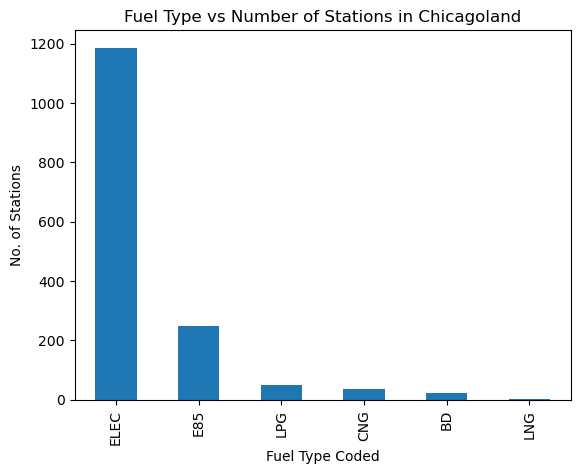

In [231]:
ftc.plot(kind = 'bar')
plt.xlabel("Fuel Type Coded")
plt.ylabel("No. of Stations")
plt.title("Fuel Type vs Number of Stations in Chicagoland")
plt.show()

In [287]:
print("The mean for this data set regarding the Total Fuel Type Code is: ", ftc.mean().round(decimals=2))
print("Standard Deviation:" , ftc.std())
print("Median:" , ftc.median())

The mean for this data set regarding the Total Fuel Type Code is:  257.67
Standard Deviation: 463.66999759167794
Median: 42.0


In [ ]:
# Has AFA increased over the recent years? 

In [232]:
df2['Open Date'] = pd.to_datetime(df2['Open Date'], errors='coerce')

In [242]:
df2['Year'] = df2['Open Date'].dt.strftime('%Y')
data_year = df2['Year'].value_counts()
df3 = data_year.sort_index()

## 

Text(0.5, 1.0, 'Fuel Type vs Number of New Stations in Chicagoland')

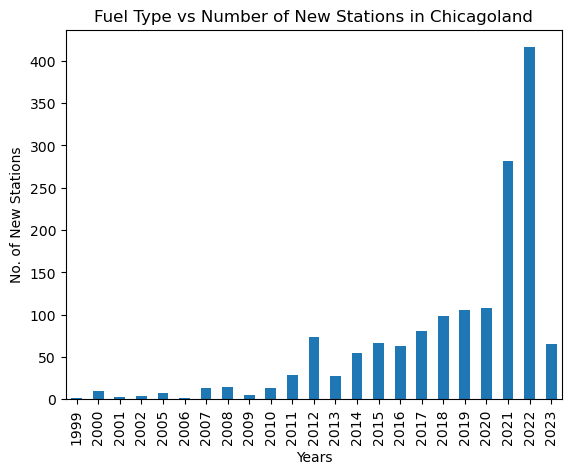

In [243]:
df3.plot(kind = 'bar')
plt.xlabel("Years")
plt.ylabel("No. of New Stations")
plt.title("Fuel Type vs Number of New Stations in Chicagoland")


In [244]:
from sklearn.linear_model import LinearRegression

X = df3[["2021"]].array.reshape(-1, 1)
y = df3[["2022"]].array.reshape(-1, 1)

In [245]:
regressor = LinearRegression()
regressor.fit(X, y)

LinearRegression()

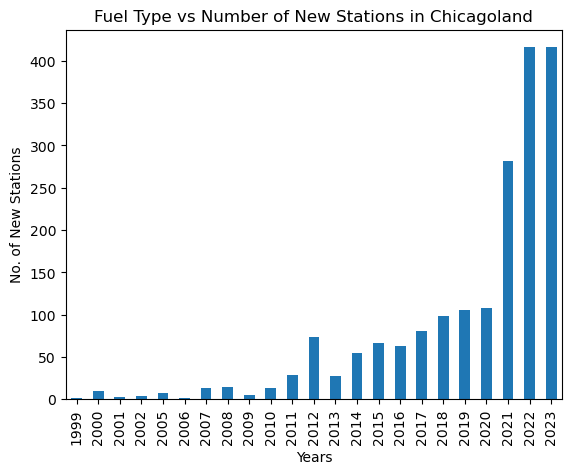

In [246]:
y_pred = regressor.predict(X)
df3["2023"] = regressor.predict(X)
df3.plot(kind = 'bar')
plt.xlabel("Years")
plt.ylabel("No. of New Stations")
plt.title("Fuel Type vs Number of New Stations in Chicagoland")
plt.show()

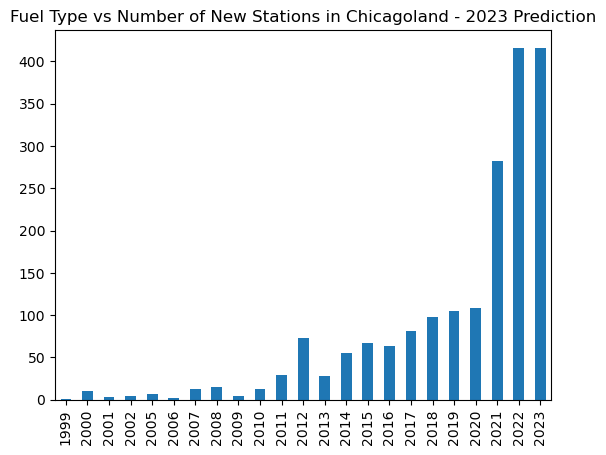

In [247]:
df3["2023"] = regressor.predict(X)
df3.plot(kind = 'bar')
plt.title("Fuel Type vs Number of New Stations in Chicagoland - 2023 Prediction")
plt.show()